Details
- Name: Arnav Agarwal
- Enrollment No. 23118009
- Batch: 2
- Branch: PI
- Subject: DAI-101

In [59]:
import warnings
warnings.filterwarnings("ignore")

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Best Model
- SVR ( Support Vector Regressor )
- R2_score = 0.437

Management Techniques:
- Majority orders are of size 2
- More sitting space for 2 people
- Food serving size can be adjusted to 2 people to account for more people
- this will reduce cost of food preparation and can lead to higher margins

Data Preparation

In [61]:
data = pd.read_csv("tips (data for regression problem).csv")
data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [62]:
data.shape

(244, 7)

In [63]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [64]:
data.isna().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [65]:
data.sex = data.sex.map({"Male":1,"Female":0})
data.smoker = data.smoker.map({"No":0,"Yes":1})
data.day = data.day.map({"Sat":3,"Sun":2,"Thur":1,"Fri":0})
data.time = data.time.map({"Dinner":1,"Lunch":0})

Impactful Parmeters

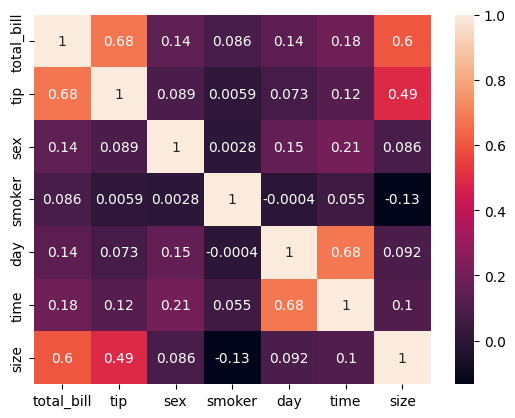

In [66]:
sns.heatmap(data.corr(),annot=True)
plt.show()

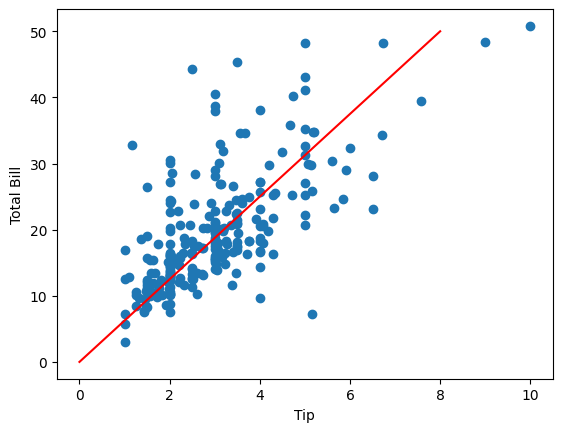

In [67]:
plt.scatter(data.tip,data.total_bill)
plt.plot([0,8],[0,50],color="red")
plt.xlabel("Tip")
plt.ylabel("Total Bill")
plt.show()

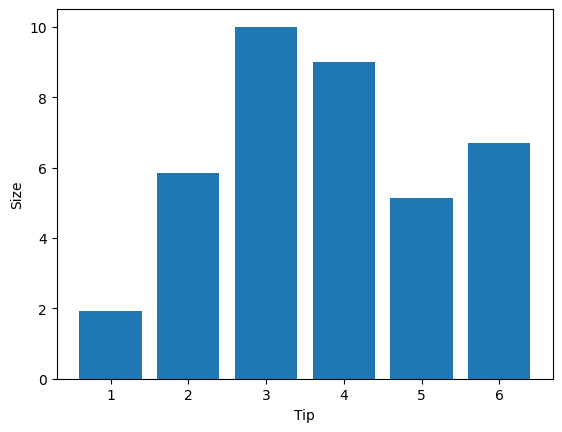

In [68]:
plt.bar(data["size"],data.tip)
plt.xlabel("Tip")
plt.ylabel("Size")
plt.show()

[]

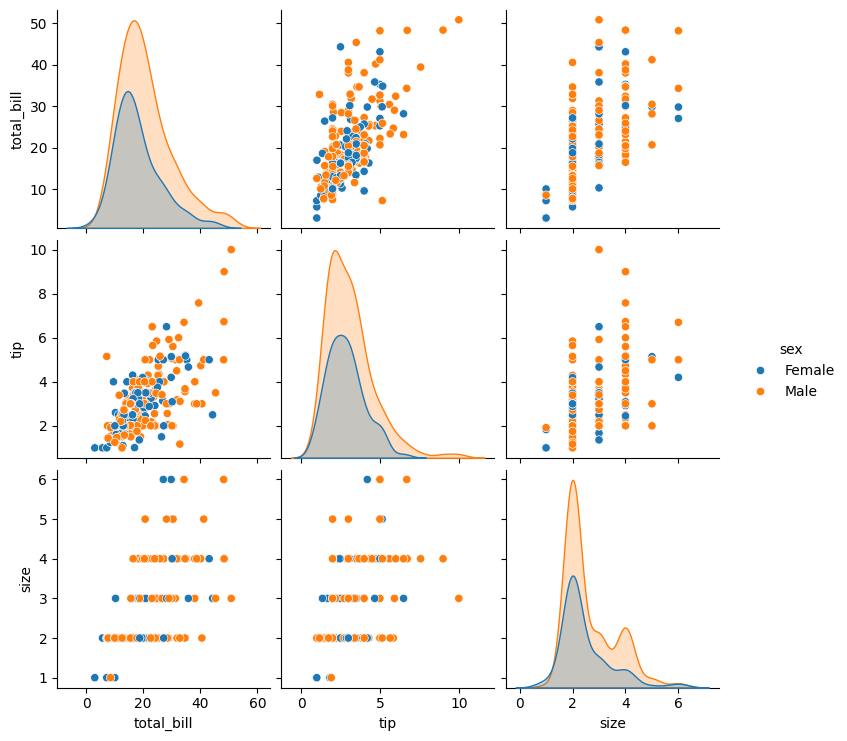

In [84]:
new_data = data[["sex","total_bill","tip","size"]]
new_data.sex = new_data.sex.map({1:"Male",0:"Female"})
sns.pairplot(new_data,hue="sex")
plt.plot()

[]

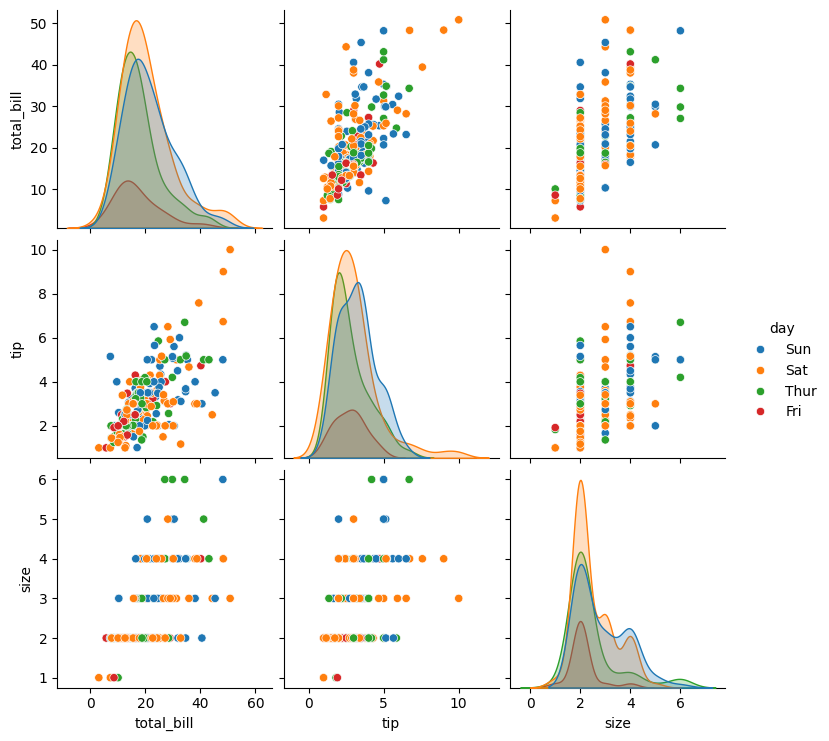

In [86]:
new_data = data[["day","total_bill","tip","size"]]
new_data.day = new_data.day.map({3:"Sat",2:"Sun",1:"Thur",0:"Fri"})
sns.pairplot(new_data,hue="day")
plt.plot()

Most Impactful features are
- Total bill
- size

In [70]:
from sklearn.model_selection import train_test_split
X = data.drop(columns="tip")
y = data.tip
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

Importing accuracy metrics

In [71]:
from sklearn.metrics import root_mean_squared_error as rmse
from sklearn.metrics import mean_absolute_error as mae 
from sklearn.metrics import r2_score  

Regression Models evaluated:
- Linear Regression
- Ridge
- Lasso
- SVR (Support Vector Regressor)
- Decision Tree Regressor
- KNR (KNeighborsRegressor)

1) Linear Regression

In [72]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)
y_preds1 = lr.predict(X_test)
print("RMSE",rmse(y_test,y_preds1))
print("MAE",mae(y_test,y_preds1))
print("R2",r2_score(y_test,y_preds1))

RMSE 0.9575835581204669
MAE 0.7135565072874966
R2 0.304374305067185


2) Ridge Regression

In [73]:
from sklearn.linear_model import Ridge
rg = Ridge()
rg.fit(X_train,y_train)
y_preds2 = rg.predict(X_test)
print("RMSE",rmse(y_test,y_preds2))
print("MAE",mae(y_test,y_preds2))
print("R2",r2_score(y_test,y_preds2))

RMSE 0.9558386938528447
MAE 0.7124121514160188
R2 0.3069070690617033


3) Lasso Regression

In [74]:
from sklearn.linear_model import Lasso
ls = Lasso()
ls.fit(X_train,y_train)
y_preds3 = ls.predict(X_test)
print("RMSE",rmse(y_test,y_preds3))
print("MAE",mae(y_test,y_preds3))
print("R2",r2_score(y_test,y_preds3))

RMSE 0.8602968590999885
MAE 0.6625712319635088
R2 0.43853986070653217


4) SVR

In [75]:
from sklearn.svm import SVR
svr1 = SVR()
svr1.fit(X_train,y_train)
y_preds4 = svr1.predict(X_test)
print("RMSE",rmse(y_test,y_preds4))
print("MAE",mae(y_test,y_preds4))
print("R2",r2_score(y_test,y_preds4))

RMSE 0.8612817716016837
MAE 0.62350661940499
R2 0.4372535473837289


5) Decision Tree Regressor - check with hyperparameters

In [76]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(X_train,y_train)
y_preds5 = dtr.predict(X_test)
print("RMSE",rmse(y_test,y_preds5))
print("MAE",mae(y_test,y_preds5))
print("R2",r2_score(y_test,y_preds5))

RMSE 1.2565165274614511
MAE 0.9990540540540541
R2 -0.197729276443934


6) KNR

In [77]:
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor()
knr.fit(X_train,y_train)
y_preds6 = knr.predict(X_test)
print("RMSE",rmse(y_test,y_preds6))
print("MAE",mae(y_test,y_preds6))
print("R2",r2_score(y_test,y_preds6))

RMSE 0.9967594792423393
MAE 0.774027027027027
R2 0.24629221085436614


Hyperparameter Testing for KNR

In [78]:
hyper_data1 = {}
for i in range(5,12):
    knr = KNeighborsRegressor(n_neighbors=i)
    knr.fit(X_train,y_train)
    y_preds6 = knr.predict(X_test)
    hyper_data1[i] = round(r2_score(y_test,y_preds6),2)

print(hyper_data1)

{5: 0.25, 6: 0.29, 7: 0.28, 8: 0.31, 9: 0.3, 10: 0.33, 11: 0.33}


Hyperparameter Testing for Decision Tree Regressor

In [79]:
hyper_data2 = {}
criterion = ["squared_error", "friedman_mse", "absolute_error", "poisson"]
for i in criterion:
    dtr = DecisionTreeRegressor()
    dtr.fit(X_train,y_train)
    y_preds5 = dtr.predict(X_test)
    hyper_data2[i] = round(r2_score(y_test,y_preds5),2)

hyper_data2

{'squared_error': -0.22,
 'friedman_mse': -0.11,
 'absolute_error': -0.14,
 'poisson': -0.06}

Hyperparameter Testing for SVR

In [80]:
hyper_data3 = {}
kernel = ["linear", "poly", "rbf", "sigmoid"]
degree = 1
for i in kernel:
    for degree1 in range(1,6):
        svr1 = SVR(kernel=i,degree=degree1)
        svr1.fit(X_train,y_train)
        y_preds4 = svr1.predict(X_test)
        hyper_data3[str(i)+str(degree1)] = round(r2_score(y_test,y_preds4),2)

hyper_data3

{'linear1': 0.33,
 'linear2': 0.33,
 'linear3': 0.33,
 'linear4': 0.33,
 'linear5': 0.33,
 'poly1': 0.41,
 'poly2': 0.28,
 'poly3': -0.04,
 'poly4': -0.43,
 'poly5': -1.16,
 'rbf1': 0.44,
 'rbf2': 0.44,
 'rbf3': 0.44,
 'rbf4': 0.44,
 'rbf5': 0.44,
 'sigmoid1': -15.33,
 'sigmoid2': -15.33,
 'sigmoid3': -15.33,
 'sigmoid4': -15.33,
 'sigmoid5': -15.33}

Based on accuracy metrics, Best model for the given dataset is:
SVR with RBF kernel